# Custom CNN Architectures for Image Classification

This notebook explores the design, training, and evaluation of custom Convolutional Neural Network (CNN) architectures for image classification tasks. The project investigates how different architectural choices—such as the number and types of layers, batch normalization, and learning rate scheduling—affect model performance on standard image datasets.

Key objectives:
- Build and compare several custom CNN architectures.
- Use advanced training strategies, including batch normalization and adaptive learning rates.
- Visualize training progress and evaluate models using validation metrics.
- Summarize best practices and insights for image classification with deep learning.

*Required libraries: TensorFlow/Keras, NumPy, Matplotlib*


In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, 32 * 32 * 3).astype("float32")
X_val_flat = X_val.reshape(-1, 32 * 32 * 3).astype("float32")

In [ ]:
X_train = scaler.fit_transform(X_train_flat).reshape(-1, 32, 32, 3)
X_val = scaler.transform(X_val_flat).reshape(-1, 32, 32, 3)

In [ ]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

In [ ]:
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (50000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)


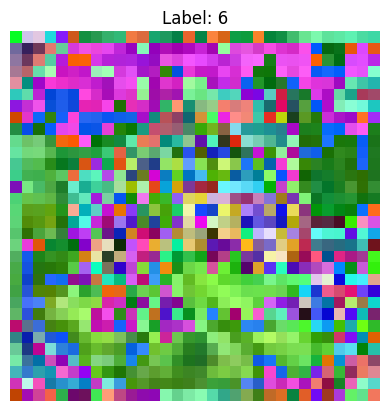

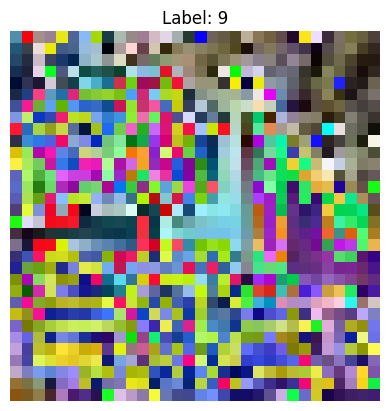

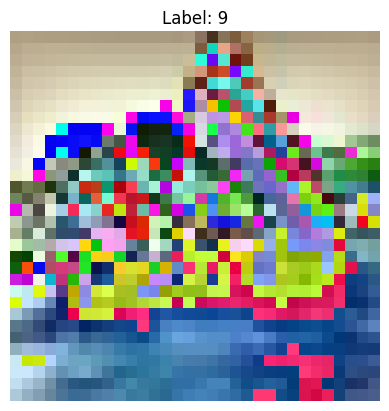

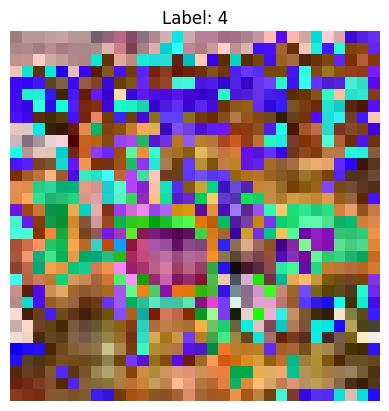

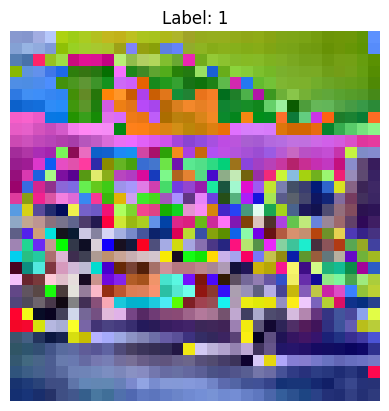

In [ ]:
for i in range(5):
    plt.imshow((X_train[i] * 255).astype("uint8"))
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
    plt.show()


In [ ]:
def create_cnn():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

cnn_model = create_cnn()
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.5
    return lr

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
callbacks = [tf.keras.callbacks.LearningRateScheduler(lr_schedule)]

history = cnn_model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=128,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 195s 485ms/step - accuracy: 0.3666 - loss: 1.8299 - val_accuracy: 0.5424 - val_loss: 1.2970 - learning_rate: 0.0010
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 476ms/step - accuracy: 0.5607 - loss: 1.2378 - val_accuracy: 0.6623 - val_loss: 0.9676 - learning_rate: 0.0010
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 181s 463ms/step - accuracy: 0.6361 - loss: 1.0311 - val_accuracy: 0.6967 - val_loss: 0.8768 - learning_rate: 0.0010
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 475ms/step - accuracy: 0.6863 - loss: 0.8954 - val_accuracy: 0.7132 - val_loss: 0.8206 - learning_rate: 0.0010
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 471ms/step - accuracy: 0.7155 - loss: 0.8122 - val_accuracy: 0.7461 - val_loss: 0.7426 - learning_rate: 0.0010
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 178s 456ms/step - accuracy: 0.7500 - loss: 0.7126 - val_accuracy: 0.7425 - val_loss: 0.7678 - learning_rate: 0.0010
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 181s 463ms/step - accura

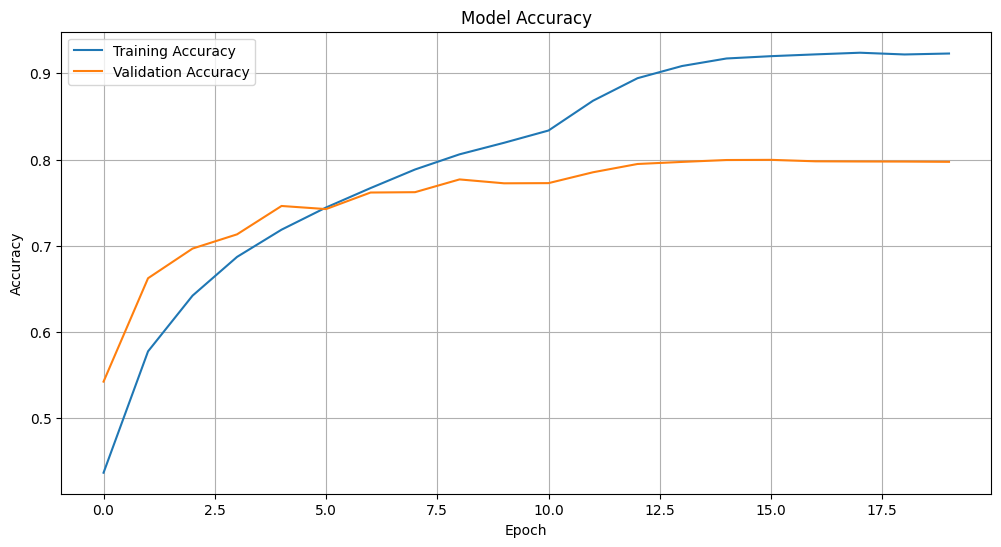

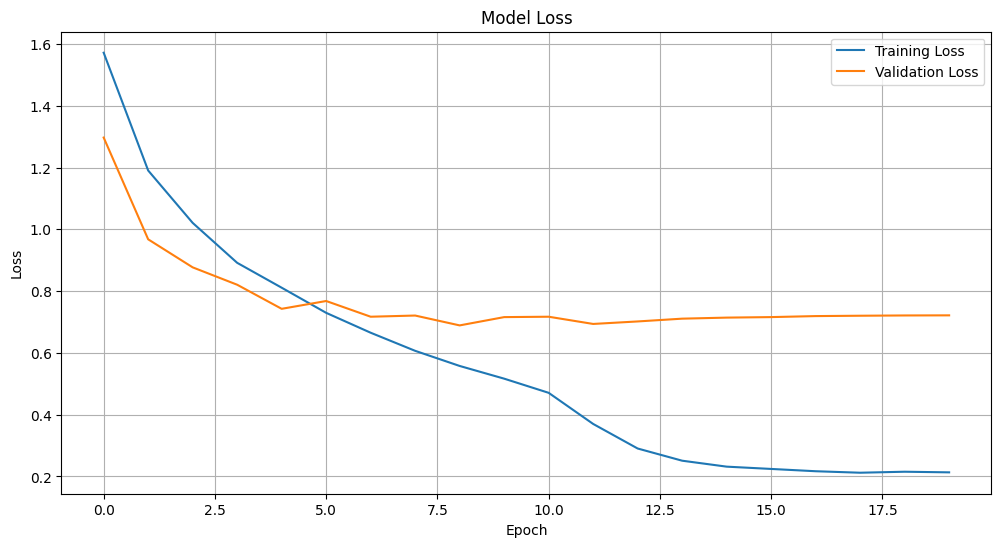

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curves(history)


In [ ]:
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Validation Accuracy: 0.80


In [ ]:
y_val_pred = np.argmax(cnn_model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


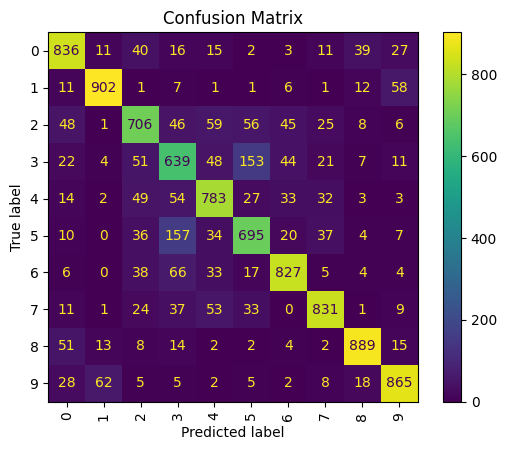

In [ ]:
conf_matrix = confusion_matrix(y_val_true, y_val_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cnn_model.save("cnn_model.h5")
print("Model saved as cnn_model.h5")

Model saved as cnn_model.h5
